<a href="https://colab.research.google.com/github/Jeffersonl22/Sistema-Fuzzy-Avaliador-Potabilidade-Da-Agua/blob/main/LF_Jairo_JefferonLopes_Luana_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lógica Fuzzy**
> A Lógica Fuzzy (Nebulosa ou Difusa), comumente tratada como uma extensão da lógica booleana, é uma lógica multivalorada capaz de capturar informações vagas, em geral descritas em uma linguagem natural, e convertê-las para um formato numérico.
* Um valor lógico difuso, conhecido por grau de pertinência, é um valor qualquer no intervalo [0, 1].
  * Determina o grau em que um determinado elemento pertence a um conjunto, permitindo uma transição gradual da falsidade para a verdade.
  * Não existe uma base formal para determinar esse valor que é escolhido experimentalmente. 

> As implementações da lógica difusa permitem que estados não precisos possam ser tratados por dispositivos de controle.
 * Desse modo, é possível avaliar conceitos não quantificáveis.
 * Casos práticos: 
  * Avaliar a temperatura (quente, morno, frio, ...)
  * Sentimento de felicidade (radiante, feliz, apático,
triste, ...)

>O presente notebook colab, é uma adaptação do projeto que introduz o desenvolvimento de Sistemas Fuzzy criado por Alison Zille Lopes.
---
{1} SCIKIT-FUZZY. Scikit-Fuzzy Overview. Disponível em: https://pythonhosted.org/scikit-fuzzy/overview.html. Acesso em: 19 fev 2021.

{2} PISTORI, H. Exemplo de aplicação de lógica nebulosa (fuzzy). Disponível em: https://colab.research.google.com/drive/13nqdB-kHLIMUxemuQJfnV1bqrLzM3hPS. Acesso em: 19 fev 2021.

{3} NEVES,E.P; DUARTE,M.A.Q;ALVARADO,F.V.Sistema baseado em regras fuzzy para avaliação da
qualidade da agua.Disponível em: https://www.fc.unesp.br/Home/Departamentos/Matematica/revistacqd2228/v14a09-sistema-baseado-em-regras-fuzzy.pdf. Acesso em 15 de dezembro 2021. 

{4} LOPES,A.Z.Lógica Fuzzy.Disponível em: https://colab.research.google.com/drive/1fQCvZ6w-3q5ZPDy-iDRabAnR7vmq8Dqr?usp=sharing. Acesso em: 15 de dezembro 2021. 

In [ ]:
# [1] Instação do pacote skfuzzy
!pip install scikit-fuzzy

# **Sistema Fuzzy**
> Sistemas são desenvolvidos para resolver problemas. Assim, precisamos do problema que pretendemos resolver através de um Sistema Fuzzy, o qual pode ser visto abaixo.

>**Problema:** 
Uma empresa que lida com o tratamento de água deseja saber a potabilidade da água de uma determinada amostra. A potabilidade da água é considerada boa se estiver em um intervalo de 0,7 até 1,3.

> O projeto do Sistema Fuzzy será organizado conforme as três etapas do raciocínio fuzzy:
1.   Fuzzificação
2.   Inferência Fuzzy
3.   Defuzzificação



# **Fuzzificação**
> Etapa na qual as variáveis linguísticas são definidas de forma subjetiva, bem como as funções membro (funções de pertinência)

> Engloba:
* Análise do Problema
* Definição das Variáveis
* Definição das Funções de pertinência
* Criação das Regiões

> Na definição das funções de pertinência para cada variável, diversos tipos de espaço podem ser gerados:
* Triangular, Trapezoidal, Gaussiana, ...

> Assim, segundo o **problema** apresentado, estamos desenvolvendo um Sistema Fuzzy que faz a classificação da Qualidade da Água, podendo auxiliar nas análises de qualidade da água utilizada para consumo humano em Campo Grande-MS.

* Variáveis de Entrada:
  * Cor Aparente:
    * Universo (intervalo de valores): [-6 , 34]
    * Conjuntos Fuzzy/Funções de Pertinência: boa, adequada, inadequada
  * PH (potencial Hidrogenionico):
    * Universo (intervalo de valores): [-6 , 14,5]
    * Conjuntos Fuzzy/Funções de Pertinência: inadequado baixo, adequado, bom,inadequado
  * Turbidez:
    * Universo (intervalo de valores): [-1,5 , 11]
    * Conjuntos Fuzzy/Funções de Pertinência: boa, adequada, inadequada
* Variáveis de Saída:
  * Potabilidade:
    * Universo (intervalo de valores): [-0,5 , 1,3]
    * Conjuntos Fuzzy/Funções de Pertinência: boa, adequada e
inadequada


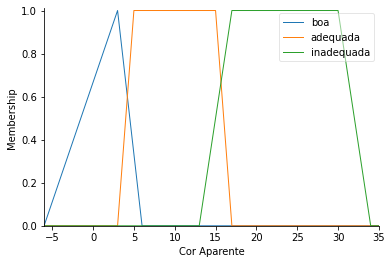

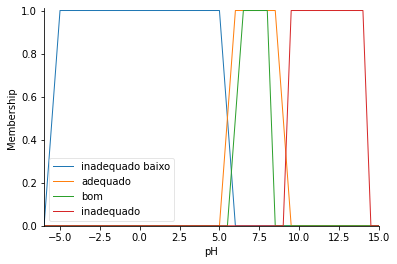

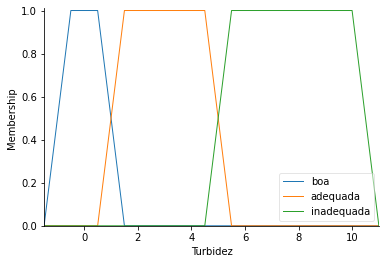

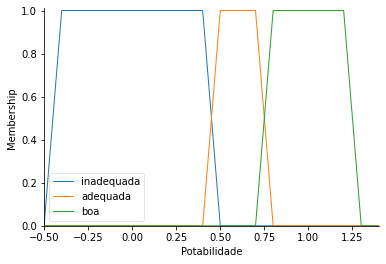

In [ ]:
# [2] Fuzzificação
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando as variáveis do problema
corAparente = ctrl.Antecedent(np.arange(-6, 35.1, 1), 'Cor Aparente')
pH = ctrl.Antecedent(np.arange(-6, 15.1, 0.1), 'pH')
turbidez = ctrl.Antecedent(np.arange(-1.5, 11.1, 0.1), 'Turbidez')
potabilidade = ctrl.Consequent(np.arange(-0.5, 1.5, 0.1), 'Potabilidade')

# Criando as funções de pertinência para corAparente
corAparente['boa'] = fuzz.trapmf(corAparente.universe, [-6, 3, 3, 6])
corAparente['adequada'] = fuzz.trapmf(corAparente.universe,  [3, 5, 15, 17])
corAparente['inadequada'] = fuzz.trapmf(corAparente.universe, [13, 17, 30, 34])

# Criando as funções de pertinência para pH
pH['inadequado baixo'] = fuzz.trapmf(pH.universe, [-6, -5, 5, 6])
pH['adequado'] = fuzz.trapmf(pH.universe, [5, 6, 8.5, 9.5])
pH['bom'] = fuzz.trapmf(pH.universe, [5.5, 6.5, 8, 8.5])
pH['inadequado'] = fuzz.trapmf(pH.universe, [9, 9.5, 14, 14.5])

# Criando as funções de pertinência para turbidez
turbidez['boa'] = fuzz.trapmf(turbidez.universe, [-1.5, -0.5, 0.5, 1.5])
turbidez['adequada'] = fuzz.trapmf(turbidez.universe,  [0.5, 1.5, 4.5, 5.5])
turbidez['inadequada'] = fuzz.trapmf(turbidez.universe, [4.5, 5.5, 10, 11])

# Criando as funções de pertinência para potalidade
potabilidade['inadequada'] = fuzz.trapmf(potabilidade.universe, [-0.5, -0.4, 0.4, 0.5])
potabilidade['adequada'] = fuzz.trapmf(potabilidade.universe,  [0.4, 0.5, 0.7, 0.8])
potabilidade['boa'] = fuzz.trapmf(potabilidade.universe, [0.7, 0.8, 1.2, 1.3])


# Visualizando as funções de pertinência para cada variável
corAparente.view()
pH.view()
turbidez.view()
potabilidade.view()




# **Inferência Fuzzy**
> Etapa na qual as proposições (regras) são definidas e depois são examinadas
paralelamente.

> Engloba:
* Definição das proposições
* Análise das regras
* Criação da região resultante

> Definição das Proposições para o Sistema Fuzzy de controle da validade.
* Base de Conhecimento/Regras

* **SE** (Aparencia é Boa) e (pH é Inadequado Baixo) e (Turbidez é Boa) **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparencia é Boa) e (pH é Adequado) e (Turbidez é Boa) **ENTÃO** (Potabilidade  é Adequada) 

* **SE** (Aparencia é Boa) e (pH é Bom) e (Turbidez  é Boa)  **ENTÃO** (Potabilidade é Boa) 

* **SE** (Aparência é Boa) e (pH é Inadequado Alto) e (Turbidez  é Boa) **ENTÃO** (Potabilidade é Inadequada) 

* **SE** (Aparencia é Boa) e (pH é Inadequado Baixo) e (Turbidez é Adequada) **ENTÃO** (Potabilidade  é Inadequada)

* **SE** (Aparencia é Boa) e (pH é Adequado) e (Turbidez é Adequada) **ENTÃO** (Potabilidade  é Adequada)

* **SE** (Aparencia é Boa) e (pH é Bom) e (Turbidez  é Adequada)  **ENTÃO** (Potabilidade é Boa)

* **SE** (Aparência é Boa) e (pH é Inadequado Alto) e (Turbidez  é Adequada)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparencia é Boa) e (pH é Inadequado Baixo) e (Turbidez é Inadequada) **ENTÃO** (Potabilidade  é Inadequada)

* **SE** (Aparencia é Boa) e (pH é Adequado) e (Turbidez é Inadequada) **ENTÃO** (Potabilidade  é Inadequada)

* **SE** (Aparencia é Boa) e (pH é Bom) e (Turbidez  é Inadequada)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparência é Boa) e (pH é Inadequado Alto) e (Turbidez  é Inadequada)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparencia é Inadequada) e (pH é Inadequado Baixo) e (Turbidez é Boa) **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparencia é Inadequada) e (pH é Adequado) e (Turbidez é Boa) **ENTÃO** (Potabilidade  é Inadequada) 

* **SE** (Aparencia é Inadequada) e (pH é Bom) e (Turbidez  é Boa)  **ENTÃO** (Potabilidade é Adequada) 

* **SE** (Aparência é Inadequada) e (pH é Inadequado Alto) e (Turbidez  é Boa) **ENTÃO** (Potabilidade é Inadequada) 

* **SE** (Aparencia é Inadequada) e (pH é Inadequado Baixo) e (Turbidez é Adequada) **ENTÃO** (Potabilidade  é Inadequada)

* **SE** (Aparencia é Inadequada) e (pH é Adequado) e (Turbidez é Adequada) **ENTÃO** (Potabilidade  é Inadequada)

* **SE** (Aparencia é Inadequada) e (pH é Bom) e (Turbidez  é Adequada)  **ENTÃO** (Potabilidade é Adequada)

* **SE** (Aparência é Inadequada) e (pH é Inadequado Alto) e (Turbidez  é Adequada)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparencia é Inadequada) e (pH é Inadequado Baixo) e (Turbidez é Inadequada) **ENTÃO** (Potabilidade  é Inadequada)

* **SE** (Aparencia é Inadequada) e (pH é Adequado) e (Turbidez é Inadequada) **ENTÃO** (Potabilidade  é Inadequada)

* **SE** (Aparencia é Inadequada) e (pH é Bom) e (Turbidez  é Inadequada)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparência é Inadequada) e (pH é Inadequado Alto) e (Turbidez  é Inadequada)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparência é Adequada) e (pH é Inadequado Baixo) e (Turbidez  é Boa)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparência é Adequada) e (pH é Adequado) e (Turbidez  é Boa)  **ENTÃO** (Potabilidade é Adequada)

* **SE** (Aparência é Adequada) e (pH é Bom) e (Turbidez  é Boa)  **ENTÃO** (Potabilidade é Boa)

* **SE** (Aparência é Adequada) e (pH é Inadequado Alto) e (Turbidez  é Boa)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparência é Adequada) e (pH é Inadequado Baixo) e (Turbidez  é Adequada)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparência é Adequada) e (pH é Adequado) e (Turbidez  é Adequada)  **ENTÃO** (Potabilidade é Adequada)

* **SE** (Aparência é Adequada) e (pH é Bom) e (Turbidez  é Adequada)  **ENTÃO** (Potabilidade é Adequada)

* **SE** (Aparência é Adequada) e (pH é Inadequado Alto) e (Turbidez  é Adequada)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparência é Adequada) e (pH é Inadequado Baixo) e (Turbidez  é Inadequada)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparência é Adequada) e (pH é Adequado) e (Turbidez  é Inadequada)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparência é Adequada) e (pH é Bom) e (Turbidez  é Inadequada)  **ENTÃO** (Potabilidade é Inadequada)

* **SE** (Aparência é Adequada) e (Inadequado Alto) e (Turbidez  é Inadequada)  **ENTÃO** (Potabilidade é Inadequada)

# **Defuzzificação**
Etapa na qual as regiões resultantes são convertidas em valores para a variável de saída do sistema.

In [ ]:

# [3] Inferência Fuzzy e Defuzzificação

# Base de Conhecimento/Regras
rule1 = ctrl.Rule(corAparente['boa'] & pH['inadequado baixo'] & turbidez['boa'], potabilidade['inadequada'])
rule2 = ctrl.Rule(corAparente['boa'] & pH['adequado'] & turbidez['boa'], potabilidade['adequada'])
rule3 = ctrl.Rule(corAparente['boa'] & pH['bom'] & turbidez['boa'], potabilidade['boa'])
rule4 = ctrl.Rule(corAparente['boa'] & pH['inadequado'] & turbidez['boa'], potabilidade['inadequada'])
rule5 = ctrl.Rule(corAparente['boa'] & pH['inadequado baixo'] & turbidez['adequada'], potabilidade['inadequada'])
rule6 = ctrl.Rule(corAparente['boa'] & pH['adequado'] & turbidez['adequada'], potabilidade['adequada'])
rule7 = ctrl.Rule(corAparente['boa'] & pH['bom'] & turbidez['adequada'], potabilidade['boa'])
rule8 = ctrl.Rule(corAparente['boa'] & pH['inadequado'] & turbidez['adequada'], potabilidade['inadequada'])
rule9 = ctrl.Rule(corAparente['boa'] & pH['inadequado baixo'] & turbidez['inadequada'], potabilidade['inadequada'])
rule10 = ctrl.Rule(corAparente['boa'] & pH['adequado'] & turbidez['inadequada'], potabilidade['inadequada'])
rule11 = ctrl.Rule(corAparente['boa'] & pH['bom'] & turbidez['inadequada'], potabilidade['inadequada'])
rule12 = ctrl.Rule(corAparente['boa'] & pH['inadequado'] & turbidez['inadequada'], potabilidade['inadequada'])
rule13 = ctrl.Rule(corAparente['inadequada'] & pH['inadequado baixo'] & turbidez['boa'], potabilidade['inadequada'])
rule14 = ctrl.Rule(corAparente['inadequada'] & pH['adequado'] & turbidez['boa'], potabilidade['inadequada'])
rule15 = ctrl.Rule(corAparente['inadequada'] & pH['bom'] & turbidez['boa'], potabilidade['adequada'])
rule16 = ctrl.Rule(corAparente['inadequada'] & pH['inadequado'] & turbidez['boa'], potabilidade['inadequada'])
rule17 = ctrl.Rule(corAparente['inadequada'] & pH['inadequado baixo'] & turbidez['adequada'], potabilidade['inadequada'])
rule18 = ctrl.Rule(corAparente['inadequada'] & pH['adequado'] & turbidez['adequada'], potabilidade['inadequada'])
rule19 = ctrl.Rule(corAparente['inadequada'] & pH['bom'] & turbidez['adequada'], potabilidade['adequada'])
rule20 = ctrl.Rule(corAparente['inadequada'] & pH['inadequado'] & turbidez['adequada'], potabilidade['inadequada'])
rule21 = ctrl.Rule(corAparente['inadequada'] & pH['inadequado baixo'] & turbidez['inadequada'], potabilidade['inadequada'])
rule22 = ctrl.Rule(corAparente['inadequada'] & pH['adequado'] & turbidez['inadequada'], potabilidade['inadequada'])
rule23 = ctrl.Rule(corAparente['inadequada'] & pH['bom'] & turbidez['inadequada'], potabilidade['inadequada'])
rule24 = ctrl.Rule(corAparente['inadequada'] & pH['inadequado'] & turbidez['inadequada'], potabilidade['inadequada'])
rule25 = ctrl.Rule(corAparente['adequada'] & pH['inadequado baixo'] & turbidez['boa'], potabilidade['inadequada'])
rule26 = ctrl.Rule(corAparente['adequada'] & pH['adequado'] & turbidez['boa'], potabilidade['adequada'])
rule27 = ctrl.Rule(corAparente['adequada'] & pH['bom'] & turbidez['boa'], potabilidade['boa'])
rule28 = ctrl.Rule(corAparente['adequada'] & pH['inadequado'] & turbidez['boa'], potabilidade['inadequada'])
rule29 = ctrl.Rule(corAparente['adequada'] & pH['inadequado baixo'] & turbidez['adequada'], potabilidade['inadequada'])
rule30 = ctrl.Rule(corAparente['adequada'] & pH['adequado'] & turbidez['adequada'], potabilidade['adequada'])
rule31 = ctrl.Rule(corAparente['adequada'] & pH['bom'] & turbidez['adequada'], potabilidade['adequada'])
rule32 = ctrl.Rule(corAparente['adequada'] & pH['inadequado'] & turbidez['adequada'], potabilidade['inadequada'])
rule33 = ctrl.Rule(corAparente['adequada'] & pH['inadequado baixo'] & turbidez['inadequada'], potabilidade['inadequada'])
rule34 = ctrl.Rule(corAparente['adequada'] & pH['adequado'] & turbidez['inadequada'], potabilidade['inadequada'])
rule35 = ctrl.Rule(corAparente['adequada'] & pH['bom'] & turbidez['inadequada'], potabilidade['inadequada'])
rule36 = ctrl.Rule(corAparente['adequada'] & pH['inadequado'] & turbidez['inadequada'], potabilidade['inadequada'])

# Sistema Fuzzy e Simulação
potabilidade_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,
                                      rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, 
                                      rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36])
potabilidade_simulador = ctrl.ControlSystemSimulation(potabilidade_ctrl)

# Entrada da corAparente
while True:
  aparenc = float(input('Digite a cor aparente (UH): '))
  if(aparenc<-6 or aparenc > 34):
    print('O valor de aparência deve estar no intervalo [-6, 34]')
    continue
  potabilidade_simulador.input['Cor Aparente'] = aparenc
  break

# Entrada da umidade pH 
while True:
  ptH = float(input('Digite o pH : '))
  if(ptH<-6 or ptH >15):
    print('O pH deve estar no intervalo [-6, 14.5]')
    continue
  potabilidade_simulador.input['pH'] = ptH
  break
  
# Entrada da umidade turbidez 
while True:
  turb = float(input('Digite a turbidez (UT): '))
  if(turb < -1.5 or turb > 12):
    print('A turbidez deve estar no intervalo [-1.5, 11]')
    continue
  potabilidade_simulador.input['Turbidez'] = turb
  break

# Computando o resultado (Inferência Fuzzy + Defuzzificação)
potabilidade_simulador.compute()
print('A potabilidade é de %.3f' % (potabilidade_simulador.output['Potabilidade']))

# Visualizando as regiões
corAparente.view(sim=potabilidade_simulador)
pH.view(sim=potabilidade_simulador)
turbidez.view(sim=potabilidade_simulador)
potabilidade.view(sim=potabilidade_simulador)